In [1]:
from utils import profile_predict, plot_profile, calculate_metrics
from RNN.models import EncoderDecoderGRU

In [2]:
curve_dir = {}
curve_dir[1] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/1/1_4_0_0.csv"
)
curve_dir[2] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/2/2_4_0_0.csv"
)
curve_dir[3] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/3/3_4_0_0.csv"
)
curve_dir[4] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/4/4_4_0_0.csv"
)
curve_dir[5] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/5/5_4_0_0.csv"
)
curve_dir[6] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/6/6_4_0_0.csv"
)
pretrained_weights = "/home/mazin/Projects/Thesis/RNN/checkpoints/polar-sky-201/SEFD-monitor_val-epoch=857-train_loss=0.0000321-val_loss=0.0001363-val_mae=0.01209.ckpt"

In [3]:
rnn_model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

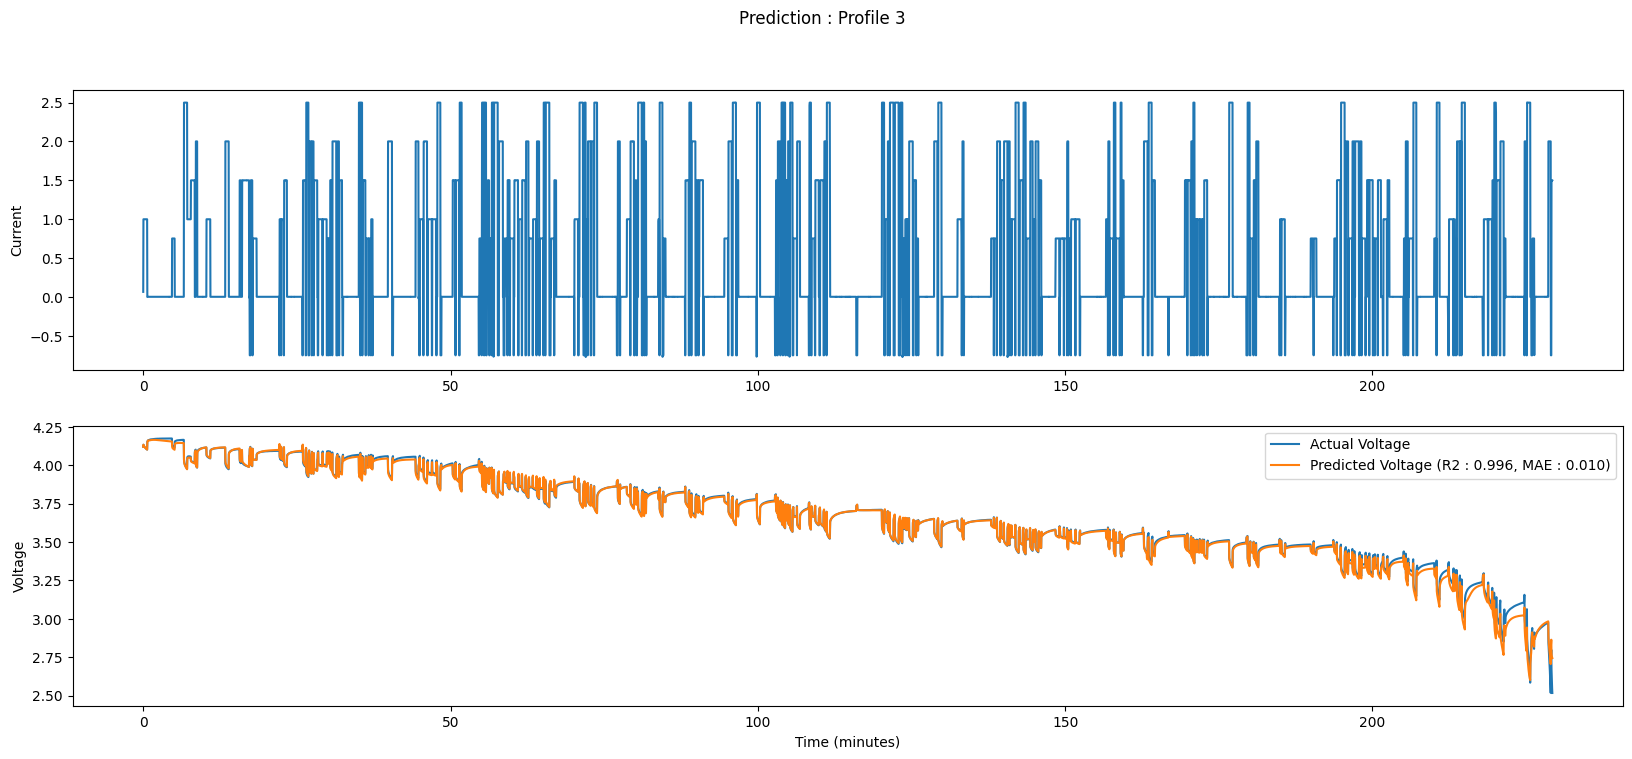

In [20]:
profile = 3

actual_current, actual_voltage, predicted_voltage= profile_predict(
    rnn_model, curve_dir[profile], decoder_input_length=1980
)
plot_profile(
    actual_current,
    actual_voltage,
    predicted_voltage,
    title=f"Prediction : Profile {profile}",
)

In [13]:
calculate_metrics(
    [actual_voltage_1, actual_voltage_2, actual_voltage_3],
    [predicted_voltage_1, predicted_voltage_2, predicted_voltage_3],
)

R-squared score: 0.997280055383163
RMSE: 0.015025219
MAE: 0.010404366
MAPE: 0.00288859


(0.997280055383163, 0.015025219, 0.010404366, 0.00288859)

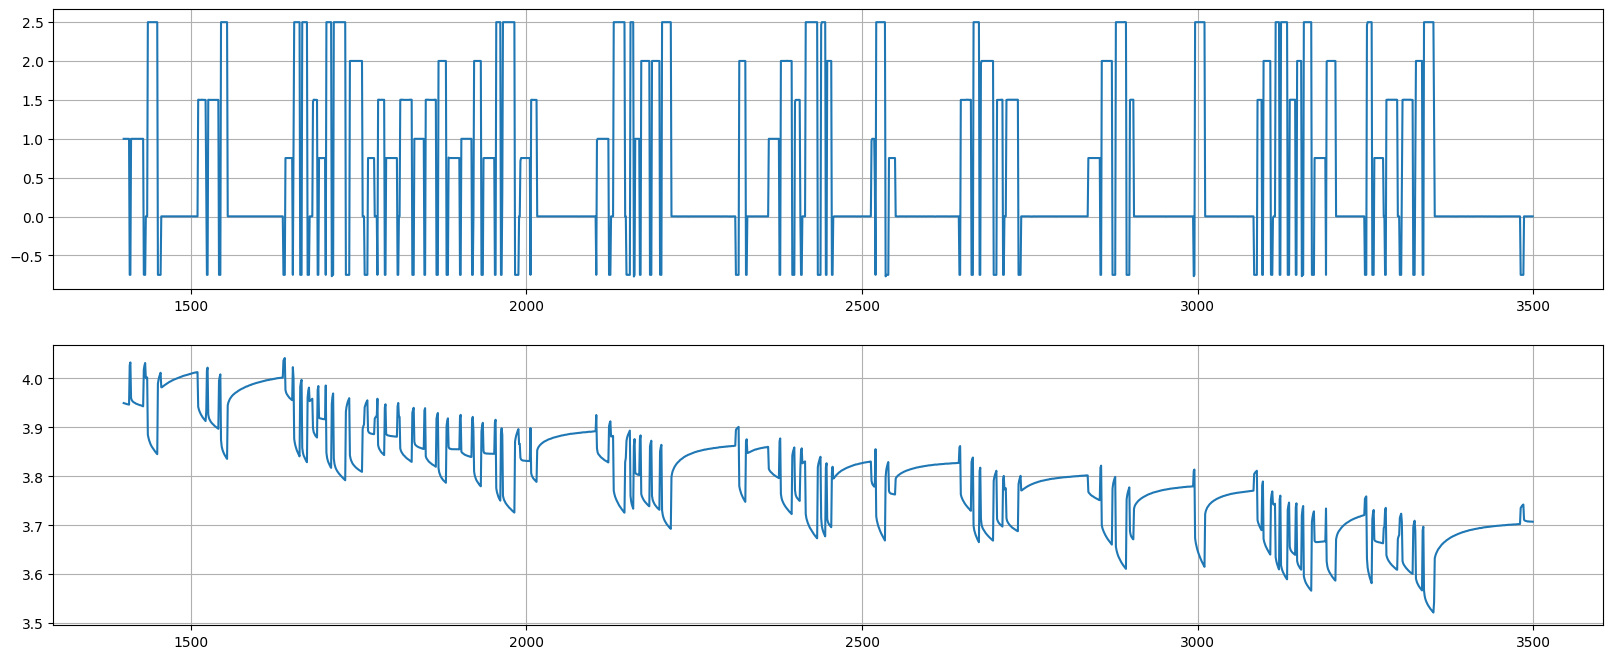

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(curve_dir[3])


start = 1400
end = 3500
fig, ax = plt.subplots(2, figsize=(20,8))

ax[0].plot(df["current"][start:end])
ax[1].plot(df["voltage"][start:end])
ax[0].grid("True")
ax[1].grid("True")
